___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2022
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- Aplicar con éxito en la red neuronal a un problema de clasificación requiere que los valores de la red estén limitados en un rango de 0 y 1.
- Una transformación no lineal es incluída en el modelo de red neuronal. Usualmente esta transformación es una función sigmoidal. 

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

**Modelo matemático**

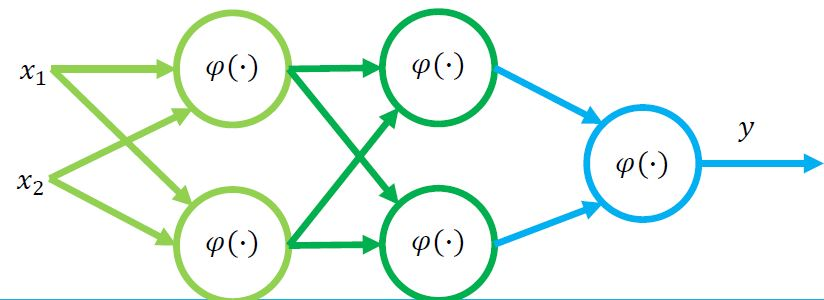

In [1]:
from IPython.display import Image
Image(filename='capa_oculta2.JPG', width=300, height=200)

<font color= #66CC00>$$\nu^{1} = w_{0}^{1}+w^{1}$$</font>
<font color= #66CC00>$$y^{1} = \varphi(\nu^{1})$$</font>
<font color= #009900>$$\nu^{2} = w_{0}^{2}+w^{2}y_{1}$$</font>
<font color= #009900>$$y^{2} = \varphi(\nu^{2})$$</font>
<font color= #3399FF>$$\nu^{3} = w_{0}^{3}+w^{3}y_{2}$$</font>
<font color= #3399FF>$$y^{3} = \varphi(\nu^{3})$$</font>

Para un problema de clasificación multiclase, el número de salidas aumenta en función del número de clases a clasificar

**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

In [2]:
#Librerías
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv(r'diabetes.csv')

In [4]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Seleccionar datos para train y test
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [6]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
#Construir red neuronal
from keras.models import Sequential
from keras.layers import Dense

# Estructura de la red neuronal
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #se puede cambiar la función de activación
model.add(Dense(1, activation='sigmoid')) #La capa de salida debe ser "" para problemas binomiales (0 y 1)

# Configuración del optimizador
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Entrenamiento de la red neuronal
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)

Epoch 1/200
6/6 [==============================] - 2s 37ms/step - loss: 0.5994 - accuracy: 0.6611
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 0.5941 - accuracy: 0.6629
Epoch 3/200
6/6 [==============================] - 0s 5ms/step - loss: 0.5892 - accuracy: 0.6704
Epoch 4/200
6/6 [==============================] - 0s 5ms/step - loss: 0.5844 - accuracy: 0.6797
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 0.5799 - accuracy: 0.6853
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 0.5756 - accuracy: 0.6909
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 0.5715 - accuracy: 0.6927
Epoch 8/200
6/6 [==============================] - 0s 5ms/step - loss: 0.5674 - accuracy: 0.6872
Epoch 9/200
6/6 [==============================] - 0s 5ms/step - loss: 0.5636 - accuracy: 0.6909
Epoch 10/200
6/6 [==============================] - 0s 4ms/step - loss: 0.5600 - accuracy: 0.7002
Epoch 11/200
6/6 [==========

6/6 [==============================] - 0s 4ms/step - loss: 0.4578 - accuracy: 0.7840
Epoch 168/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4577 - accuracy: 0.7858
Epoch 169/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4576 - accuracy: 0.7858
Epoch 170/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4575 - accuracy: 0.7840
Epoch 171/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4574 - accuracy: 0.7840
Epoch 172/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4573 - accuracy: 0.7840
Epoch 173/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4572 - accuracy: 0.7840
Epoch 174/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4571 - accuracy: 0.7840
Epoch 175/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4570 - accuracy: 0.7821
Epoch 176/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4569 - accuracy: 0.7858
Epoch 177/200
6/6 [=====

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

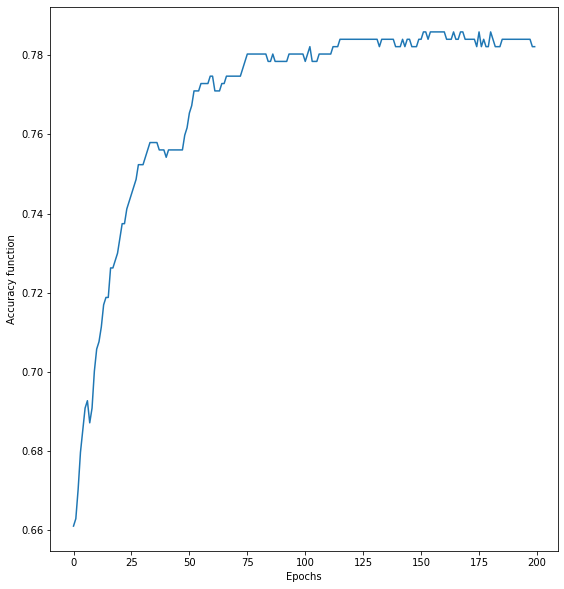

In [8]:
#Ver el performance del modelo en el entrenamiento
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')


In [9]:
#Usar el modelo para predecir
Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")


8/8 [==============================] - 0s 1ms/step


In [10]:
Y_pred

array([[0.30817783],
       [0.146488  ],
       [0.1325131 ],
       [0.21854904],
       [0.58065903],
       [0.51460236],
       [0.03072654],
       [0.6765918 ],
       [0.6551015 ],
       [0.78487563],
       [0.29795834],
       [0.78499633],
       [0.4792786 ],
       [0.33536804],
       [0.04737818],
       [0.35248023],
       [0.1157131 ],
       [0.05305711],
       [0.72546434],
       [0.5453577 ],
       [0.24573763],
       [0.07507993],
       [0.37827045],
       [0.09646262],
       [0.66288286],
       [0.85047275],
       [0.07730836],
       [0.03690935],
       [0.3421649 ],
       [0.10250032],
       [0.8361691 ],
       [0.8460063 ],
       [0.83277714],
       [0.6872206 ],
       [0.6801642 ],
       [0.7600489 ],
       [0.6317076 ],
       [0.21334004],
       [0.49165362],
       [0.4711709 ],
       [0.05060198],
       [0.62947816],
       [0.44124323],
       [0.4875584 ],
       [0.0397886 ],
       [0.6159186 ],
       [0.57653713],
       [0.166

In [11]:
Y_prob

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [12]:
#Evaluar modelo
score = model.evaluate(X_test, Y_test,verbose=1)
print(score)

8/8 [==============================] - 0s 5ms/step - loss: 0.5189 - accuracy: 0.7316
[0.5188513994216919, 0.7316017150878906]


In [13]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)
accu_train = accuracy_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
prec_train = precision_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
reca_train = recall_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))


accu_test = accuracy_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
prec_test = precision_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
reca_test = recall_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

8/8 [==============================] - 0s 1ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.782 	 0.718 	 0.622
  Test 	 0.732 	 0.613 	 0.613


In [14]:
#Comparar contra Regresión logística
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,Y_train)
Yhat = model_log.predict(X_train)

accu_train = accuracy_score(Y_train,Yhat)
prec_train = precision_score(Y_train,Yhat)
reca_train = recall_score(Y_train,Yhat)

Yhat = model_log.predict(X_test)
accu_test = accuracy_score(Y_test,Yhat)
prec_test = precision_score(Y_test,Yhat)
reca_test = recall_score(Y_test,Yhat)

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.782 	 0.741 	 0.580
  Test 	 0.736 	 0.617 	 0.625


**Ejemplo Multiclase**

- Aunque las salidas de la red neuronal están limitadas a un rango de valores entre 0 y 1, no se garantiza que la suma de estos sea igual a 1
- Transformar las salidas para que puedan ser usadas como probabilidades ayuda mucho a la interpretabilidad de las predicciones
- Transformación Softmax

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [15]:
#Librerías
import pandas as pd
from sklearn import datasets
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD, Adam
#from tensorflow.keras.optimizers import SGD

In [16]:
#Datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y #tres tipos de flores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
#creamos la variable target a dummies
dummy_y = np_utils.to_categorical(Y).astype(int)

In [20]:
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [21]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [23]:
#Construcción de la red neuronal

# neural network structure
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))

#Gradiente descendente
learning_rate=0.1
epochs = 200
momentum = 0.8
decay_rate = learning_rate/epochs
sgd = SGD(lr=learning_rate, decay=decay_rate, momentum=momentum)

# configuracion del optimizador
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# entrenamiento de la red neuronal
#history = model.fit(X, dummy_y,epochs=200, batch_size=100, verbose=1)


history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


Epoch 1/200
2/2 [==============================] - 1s 122ms/step - loss: 1.1175 - accuracy: 0.4667 - val_loss: 1.1643 - val_accuracy: 0.4333
Epoch 2/200
2/2 [==============================] - 0s 30ms/step - loss: 1.2238 - accuracy: 0.4500 - val_loss: 0.7613 - val_accuracy: 0.7000
Epoch 3/200
2/2 [==============================] - 0s 30ms/step - loss: 0.7735 - accuracy: 0.6583 - val_loss: 0.6646 - val_accuracy: 0.6333
Epoch 4/200
2/2 [==============================] - 0s 25ms/step - loss: 0.6692 - accuracy: 0.6500 - val_loss: 0.6946 - val_accuracy: 0.6000
Epoch 5/200
2/2 [==============================] - 0s 29ms/step - loss: 0.6843 - accuracy: 0.6250 - val_loss: 0.6228 - val_accuracy: 0.6333
Epoch 6/200
2/2 [==============================] - 0s 29ms/step - loss: 0.5932 - accuracy: 0.6750 - val_loss: 0.5282 - val_accuracy: 0.6333
Epoch 7/200
2/2 [==============================] - 0s 28ms/step - loss: 0.5231 - accuracy: 0.6750 - val_loss: 0.4867 - val_accuracy: 0.7000
Epoch 8/200
2/2 [==

2/2 [==============================] - 0s 24ms/step - loss: 0.0981 - accuracy: 0.9750 - val_loss: 0.2143 - val_accuracy: 0.8667
Epoch 118/200
2/2 [==============================] - 0s 23ms/step - loss: 0.1101 - accuracy: 0.9583 - val_loss: 0.1643 - val_accuracy: 0.9000
Epoch 119/200
2/2 [==============================] - 0s 23ms/step - loss: 0.1004 - accuracy: 0.9583 - val_loss: 0.1032 - val_accuracy: 0.9667
Epoch 120/200
2/2 [==============================] - 0s 24ms/step - loss: 0.1148 - accuracy: 0.9667 - val_loss: 0.2219 - val_accuracy: 0.8667
Epoch 121/200
2/2 [==============================] - 0s 24ms/step - loss: 0.1105 - accuracy: 0.9583 - val_loss: 0.2845 - val_accuracy: 0.8667
Epoch 122/200
2/2 [==============================] - 0s 24ms/step - loss: 0.1265 - accuracy: 0.9500 - val_loss: 0.0994 - val_accuracy: 1.0000
Epoch 123/200
2/2 [==============================] - 0s 24ms/step - loss: 0.0963 - accuracy: 0.9750 - val_loss: 0.0989 - val_accuracy: 1.0000
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 29ms/step - loss: 0.1868 - accuracy: 0.9333 - val_loss: 0.1775 - val_accuracy: 0.8667
Epoch 176/200
2/2 [==============================] - 0s 27ms/step - loss: 0.1023 - accuracy: 0.9583 - val_loss: 0.1024 - val_accuracy: 0.9667
Epoch 177/200
2/2 [==============================] - 0s 25ms/step - loss: 0.1068 - accuracy: 0.9750 - val_loss: 0.2749 - val_accuracy: 0.8667
Epoch 178/200
2/2 [==============================] - 0s 26ms/step - loss: 0.1156 - accuracy: 0.9500 - val_loss: 0.1115 - val_accuracy: 0.9667
Epoch 179/200
2/2 [==============================] - 0s 24ms/step - loss: 0.0969 - accuracy: 0.9750 - val_loss: 0.1196 - val_accuracy: 0.9667
Epoch 180/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0813 - accuracy: 0.9917 - val_loss: 0.2622 - val_accuracy: 0.8667
Epoch 181/200
2/2 [==============================] - 0s 24ms/step - loss: 0.1131 - accuracy: 0.9500 - val_loss: 0.0890 - val_accuracy: 0.9667
Epoch 

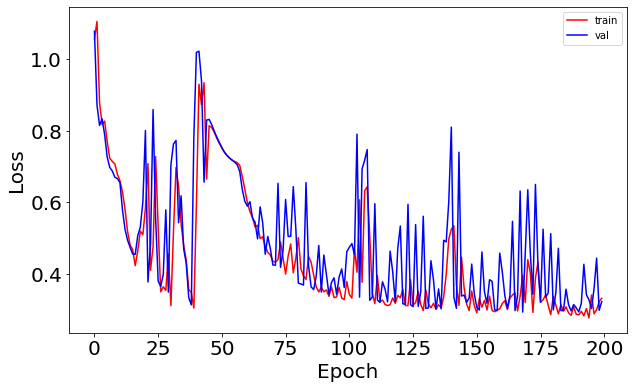

In [24]:
#Graficar el categorical crossentropy
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [25]:
#Predecir con el modelo
#Y_pred = model.predict_classes(X)
#Y_prob = model.predict_proba(X)


Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")

1/1 [==============================] - 0s 11ms/step


In [26]:
Y_pred

array([[1.3153504e-02, 9.1573280e-01, 7.1113728e-02],
       [9.9977833e-01, 2.2169607e-04, 2.4160590e-23],
       [2.0581305e-03, 4.4534862e-02, 9.5340693e-01],
       [1.3713273e-02, 8.8902295e-01, 9.7263798e-02],
       [1.0069473e-02, 9.7439688e-01, 1.5533603e-02],
       [9.9946421e-01, 5.3584483e-04, 2.0677722e-21],
       [1.1610487e-02, 9.8835421e-01, 3.5352143e-05],
       [2.0581305e-03, 4.4534862e-02, 9.5340693e-01],
       [5.0527947e-03, 1.4254138e-01, 8.5240585e-01],
       [4.7311210e-03, 9.9488920e-01, 3.7966660e-04],
       [3.0278061e-03, 7.3107779e-02, 9.2386448e-01],
       [9.9879044e-01, 1.2095757e-03, 1.0233522e-19],
       [9.9991131e-01, 8.8665140e-05, 2.6978388e-24],
       [9.9878031e-01, 1.2197098e-03, 7.2119370e-20],
       [9.9968624e-01, 3.1380751e-04, 1.7124353e-22],
       [9.9469693e-03, 9.7546858e-01, 1.4584507e-02],
       [2.0581305e-03, 4.4534862e-02, 9.5340693e-01],
       [6.9483863e-03, 9.9060142e-01, 2.4502350e-03],
       [1.4443772e-02, 7.750

In [27]:
Y_prob

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]], dtype=int32)

In [28]:
#Reverse
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = np_utils.to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [29]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [30]:
#Más métricas corregido
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)
Y_proba= model.predict(X_train)
Y_pred= np.argmax(Y_proba, axis=1)

accu_train = accuracy_score(y_train, Y_pred)
prec_train = precision_score(y_train, Y_pred,average='weighted')
reca_train = recall_score(y_train, Y_pred,average='weighted')

Y_proba= model.predict(X_test)
Y_pred= np.argmax(Y_proba, axis=1)

accu_test = accuracy_score(y_test, Y_pred)
prec_test = precision_score(y_test, Y_pred,average='weighted')
reca_test = recall_score(y_test, Y_pred,average='weighted')
print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

1/1 [==============================] - 0s 9ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.967 	 0.970 	 0.967
  Test 	 0.967 	 0.969 	 0.967


In [31]:
#Comparar contra Regresión logística
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,y_train)
Yhat = model_log.predict(X_test)

accu_train = accuracy_score(y_train,model_log.predict(X_train))
prec_train = precision_score(y_train,model_log.predict(X_train),average='weighted')
reca_train = recall_score(y_train,model_log.predict(X_train),average='weighted')

accu_test = accuracy_score(y_test,model_log.predict(X_test))
prec_test = precision_score(y_test,model_log.predict(X_test),average='weighted')
reca_test = recall_score(y_test,model_log.predict(X_test),average='weighted')

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.975 	 0.977 	 0.975
  Test 	 1.000 	 1.000 	 1.000


/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
